# _Assessed exercises for week 8 -qq plots_

### It is often the case that we wish to decide which distribution is the best fit to a single variable. For example, we might want to see whether the residuals of a linear regression are approximately normally distributed. QQ-plots are  one of the best ways to do this. They are often superior to drawing histograms as it's easier to assess whether the tails of the distribution fit.

### In this assessed exercise we're going to create some QQ-plots. The steps to create  a qqplot to compare a chosen probability distribution with a single variable x are:

## 1. Calculate the empirical cdf (ecdf) of x

## 2. Simulate a large number of observations from the chosen probability distribution

## 3. Find the quantiles of the distribution at the probabilities defined by the ecdf

#### If the two data sets match, a plot of the quantiles and the original data should  fall on a straight line. For more detail, see e.g. http://onlinestatbook.com/2/advanced_graphs/q-q_plots.html

### In this exercises we will use four data sets which come from four unknown probability  distributions. One of them comes from a N(0,1) distribution, another a t_5 distribution another a Exp(1) distribution, and finally a Chi-squared(1) distribution. The files  are labelled qq1 to qq4.txt and are all of different lengths. We're going to use  QQ-plots to find which data set matches to which probability distribution

In [103]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# First you will need to load in the data sets
path = '/Users/joshward/Desktop/Fin. Math/Y4S1/Data Programming/'
qq1 = pd.read_csv(path+'qq1.txt',header=None)
qq2 = pd.read_csv(path+'qq2.txt',header=None)
qq3 = pd.read_csv(path+'qq3.txt',header=None)
qq4 = pd.read_csv(path+'qq4.txt',header=None)

## Q1 For the first part of the task, we need to create the empirical cumulative distribution function (ecdf). This is defined as: Number of observations z less than or equal to z_i / Number of observations, for every z_i in z Write a function called which takes a set of observations z and produces the empirical cdf If you are unfamiliar with empirical cdfs, you may want to read the following article: https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480

In [104]:
def exercise1(z):
    n = z.size
    y = np.arange(1, n+1) / n 
    #creates an array where element of z is replaced by the proportion of elements of z that are less than it
    return y

### Plot each of the variables qq1, qq2, etc. versus their ecdf, as subplots in a single figure window. Save your figure and include it in your submission. plot with various axes scales

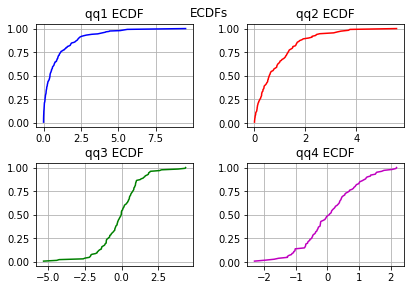

In [105]:
plt.figure(1)
plt.suptitle('ECDFs')

#qq1
plt.subplot(221)
plt.plot(qq1, exercise1(qq1),'b')
plt.title('qq1 ECDF')
plt.grid(True)

#qq2
plt.subplot(222)
plt.plot(qq2, exercise1(qq2),'r')
plt.title('qq2 ECDF')
plt.grid(True)

#qq3
plt.subplot(223)
plt.plot(qq3, exercise1(qq3),'g')
plt.title('qq3 ECDF')
plt.grid(True)

#qq4
plt.subplot(224)
plt.plot(qq4, exercise1(qq4),'m')
plt.title('qq4 ECDF')
plt.grid(True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

plt.show()

## Q2 For the next part we need to create the quantiles of a chosen probability distribution Write a function which takes an ecdf created by your function in Q1 and simulates 10,000 observations from a normal(0,1) distribution. Then calculate the quantiles of these simulations at the probabilities defined by the ecdf

In [106]:
def exercise2(ecdf):
    return [np.quantile(np.random.randn(10000),ecdf[i]) for i in range(0,len(ecdf))]

### Create a scatter plot of the theoretical quantiles from your new function (x-axis) against qq1 (y-axis). Repeat  this for each dataset, creating each plot as a subplot on the same figure. Save your figure and include it in your submission. If the two distributions match, the points should lie on a straight line - this is a QQ-plot. Which of the datasets is normally distributed variable?

# Ans: qq4

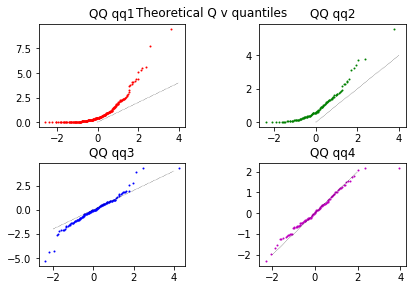

In [110]:
plt.figure(2)
plt.suptitle('Theoretical Q v quantiles')
 
plt.subplot(221)
plt.scatter(exercise2(exercise1(qq1)),qq1,color='r',s=1)
plt.title('QQ qq1') 
plt.plot([0, 4], [0, 4], color='k', linestyle=':', linewidth=0.5)

plt.subplot(222)
plt.scatter(exercise2(exercise1(qq2)),qq2,color='g',s=1)
plt.title('QQ qq2')
plt.plot([0, 4], [0, 4], color='k', linestyle=':', linewidth=0.5)
 
plt.subplot(223)
plt.scatter(exercise2(exercise1(qq3)),qq3,color='b',s=1)
plt.title('QQ qq3')
plt.plot([-2, 4], [-2, 4], color='k', linestyle=':', linewidth=0.5)

plt.subplot(224)
plt.scatter(exercise2(exercise1(qq4)),qq4,color='m',s=1)
plt.title('QQ qq4')
plt.plot([-2, 2], [-2, 2], color='k', linestyle=':', linewidth=0.5)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.5)
plt.show()

# Ans: qq4

## Q3 Create a new function that takes two arguments. The first argument should be your data Series and the second argument should be a set of simulations from some probability distribution. It should use these samples to calculate the theoretical quantiles. This function should the computed theoretical quantiles

In [108]:
def exercise3(y,d):
    return [np.quantile(d,exercise1(y)[i]) for i in range(len(y))]

## Q4 Run your function for each of the datasets, with
## - d = Series(npr.randn(10000)) (normal distribution)
## - d = Series(npr.standard_t(5,10000)) (t_5 distribution)
## - d = Series(npr.chisquare(1,10000)) (chi-squared distribution)
## Plot empirical data versus the theoretical quantiles returned by exercise3 to determine which data set matches to which probability distribution. 

## Complete the quiz 'W8 - Assessed exercises Q4' to submit your answer for this question.

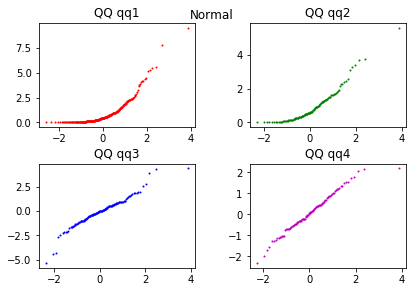

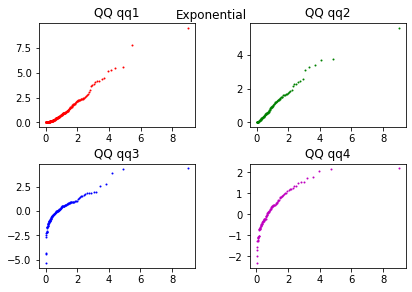

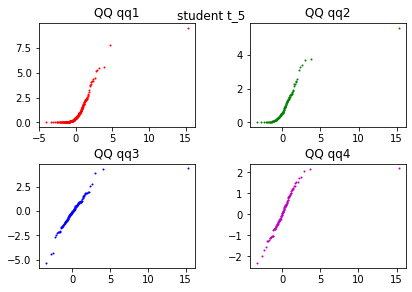

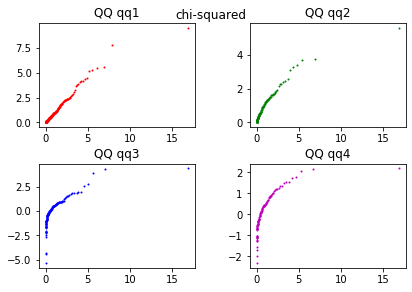

In [109]:
#Since we have to run these plots four times it is worth defining a function to process them
def plotter(qq1,qq2,qq3,qq4,dist,title):
    plt.figure(2)
    plt.suptitle(title)

    plt.subplot(221)
    plt.scatter(exercise3(qq1, dist)
    ,qq1,color='r',s=1)
    plt.title('QQ qq1')

    plt.subplot(222)
    plt.scatter(exercise3(qq2, dist)
    ,qq2,color='g',s=1)
    plt.title('QQ qq2')

    plt.subplot(223)
    plt.scatter(exercise3(qq3, dist)
    ,qq3,color='b',s=1)
    plt.title('QQ qq3')

    plt.subplot(224)
    plt.scatter(exercise3(qq4, dist)
    ,qq4,color='m',s=1)
    plt.title('QQ qq4')

    plt.subplots_adjust(top=0.93, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                        wspace=0.35)
    
    plt.show()
    
#now to test which of data set corresponds to each distribution where we expect a straight line in these cases
plotter(qq1,qq2,qq3,qq4,Series(npr.randn(10000)),'Normal') #Normal
plotter(qq1,qq2,qq3,qq4,Series(npr.exponential(1,10000)),'Exponential') #Exponential
plotter(qq1,qq2,qq3,qq4,Series(npr.standard_t(5,10000)),'student t_5') #t_5 dist
plotter(qq1,qq2,qq3,qq4,Series(npr.chisquare(1,10000)),'chi-squared') #chi - squared